# **Titanic Insights & Lesson For Modern Safety Measures :**

## **Problem Statements :**

- Perform data cleaning and exploratory data analysis (EDA) on the dataset of Titianic dataset.Explore he relationship between variables and identify patterns and trends in the data.

###**Author/Coder :**  [**Sumit Baviskar**](https://www.linkedin.com/in/sumit-baviskar/)

###**Dataset Link  :** [**Titanic Dataset**](https://www.kaggle.com/c/titanic/data)


## **Introduction :**

The Titanic dataset is a widely used dataset in data science and machine learning for performing exploratory data analysis (EDA) and building predictive models. It contains data related to passengers aboard the RMS Titanic, a passenger ship that tragically sank on its maiden voyage in 1912. The dataset consists of various features, such as demographic information, passenger details, and whether the passenger survived or not.

The Titanic dataset serves as an ideal starting point for anyone looking to understand the basics of data preprocessing, feature engineering, data visualization, and model-building. It allows data analysts, machine learning practitioners, and statisticians to explore and analyze different patterns and trends within the data to uncover insights that could inform predictions about survival rates on the Titanic.

The dataset provides an opportunity to understand how various factors, such as age, gender, class, and family size, might have influenced the likelihood of survival. EDA on this dataset involves not only cleaning and visualizing the data but also uncovering any correlations and patterns that may be critical for predictive modeling.



## **Purpose :**

The purpose of conducting an Exploratory Data Analysis (EDA) on the Titanic dataset is multi-faceted:

1. **Data Understanding**: The first step in any data analysis project is to understand the structure, variables, and relationships within the dataset. EDA helps in getting familiar with the dataset, understanding the distributions of different features, and identifying potential issues like missing or erroneous data.

2. **Data Cleaning**: During EDA, it is common to encounter missing, duplicated, or inconsistent data. Through EDA, data analysts can clean and preprocess the dataset, removing or imputing missing values and fixing data quality issues.

3. **Feature Exploration**: EDA enables the exploration of individual features (columns) and their relationships with other features. This step helps to identify which variables are most relevant for modeling and which ones may need transformation or further investigation.

4. **Identifying Patterns**: By using data visualization techniques like histograms, box plots, and scatter plots, analysts can identify underlying patterns or trends. For example, it may be revealed that women had a higher survival rate than men, or that people in higher classes had better chances of survival.

In summary, EDA is a crucial part of the data science process. It ensures that the dataset is well-understood and prepped for the next steps in analysis, modeling, or prediction, ultimately providing the foundation for making informed data-driven decisions.

# **About Dataset :**
- **pclass :** A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
  
- **sibsp(# of siblings / spouses aboard the Titanic) :** The dataset defines family relations in this way...
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch (# of siblings / spouses aboard the Titanic):** The dataset defines family relations in this way...
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children travelled only with a nanny, therefore parch=0 for them.


- **Embarked** - Port of Embarkation (	C = Cherbourg, Q = Queenstown, S = Southampton )

- **survival:( Survival )** 	0 = No, 1 = Yes



In [ ]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset
df=pd.read_csv('/content/titianic_EDA(in).csv')

In [ ]:
# Checking data
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,32.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Copying the data
df_copy=df.copy()

## **Data Cleaning :**

In [ ]:
df.info() #Informative Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
df.describe()   # Descriptive data

# Age and Fare columns very high maximum values . We have to filter the outliers

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.411765,2.294882,31.045355,0.498854,0.385027,33.295479
std,378.020061,0.492341,0.837836,16.172373,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,41.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,282.000000,8.000000,9.000000,512.329200


In [ ]:
df.shape  #rows and columns

(1309, 12)

In [ ]:
# Checking for null values in columns
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


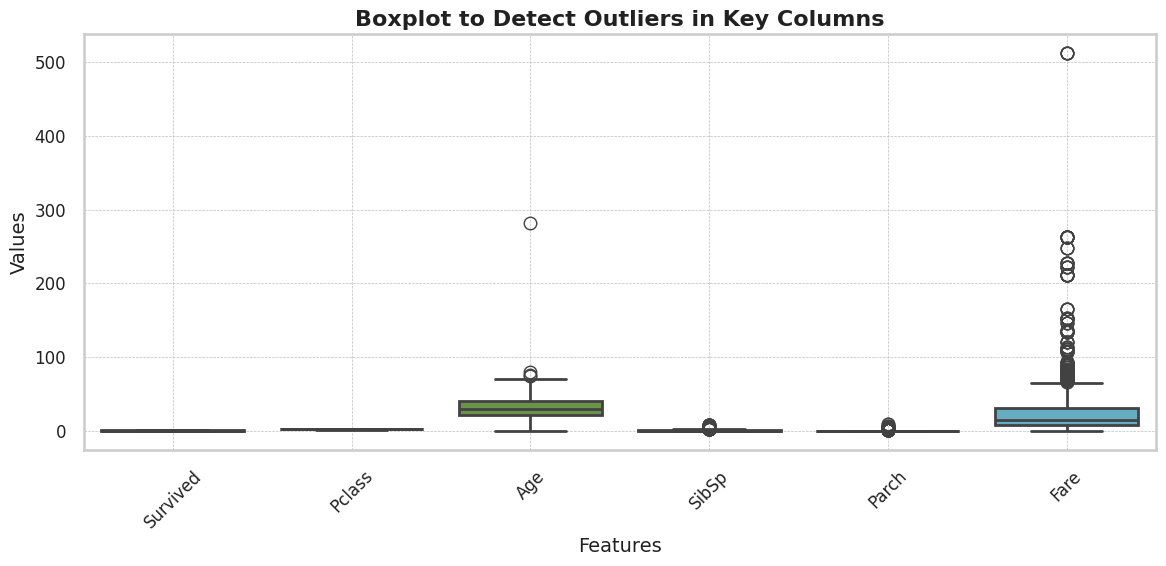

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context for a professional look
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']],
    palette=["#5C9BD1", "#D19A5C", "#67A03C", "#8E6FD2", "#DB4D6D", "#56B4D3"],  # Professional color scheme
    linewidth=2  # Set boxplot line thickness for clarity
)

# Add titles and labels
plt.title("Boxplot to Detect Outliers in Key Columns", fontsize=16, fontweight="bold", color="#212121")
plt.xlabel("Features", fontsize=14, color="#212121")
plt.ylabel("Values", fontsize=14, color="#212121")

# Customize the ticks
plt.xticks(rotation=45, fontsize=12, color="#212121")  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12, color="#212121")

# Add a grid for readability
plt.grid(color="#BDBDBD", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# IQR Interquartile Range For Age column

Q1_age = df['Age'].quantile(q=0.25)  # Select the 'Age' column
Q3_age = df['Age'].quantile(q=0.75)  # Select the 'Age' column
IQR = Q3_age - Q1_age

print(f"Q1 :{Q1_age}, Q3 :{Q3_age}, IQR : {IQR}")

Q1 :21.0, Q3 :41.0, IQR : 20.0


In [ ]:
lower_fence = Q1_age - 1.5 * IQR  # Calculate the lower fence for age
upper_fence = Q3_age + 1.5 * IQR  # Calculate the upper fence for age

print(f"Lower Fence :{lower_fence}, Upper Fence :{upper_fence}")

Lower Fence :-9.0, Upper Fence :71.0


In [ ]:
# lower fence for age is -9.0 . So that can be the case to filtering for lower case of age should be above zero.
df_filtered_age = df[(df['Age'] > 0) & (df['Age'] <= upper_fence)]

In [ ]:
# numbers of rows and columns (rows,columns)
df_filtered_age.shape

(1305, 12)

In [ ]:
# IQR Interquartile Range For Fare Column

Q1_fare = df_filtered_age['Fare'].quantile(q=0.25)  # Select the 'Fare' column
Q3_fare= df_filtered_age['Fare'].quantile(q=0.75)  # Select the 'Fare' column
IQR = Q3_fare - Q1_fare

print(f"Q1 :{Q1_fare}, Q3 :{Q3_fare}, IQR :{IQR}")
lower_fence = Q1_fare - 1.5 * IQR   # Calculate the upper fence for fare
upper_fence = Q3_fare + 1.5 * IQR    # Calculate the upper fence for fare

print(f"Lower Fence :{lower_fence}, Upper Fence :{upper_fence}")

Q1 :7.8958, Q3 :31.275, IQR :23.379199999999997
Lower Fence :-27.172999999999995, Upper Fence :66.34379999999999


In [ ]:
# lower fence for fare should be atleast be more than zero. So filtered in that way.
df_filtered = df_filtered_age[(df_filtered_age['Fare'] > 0) & (df_filtered_age['Fare'] <= upper_fence)]

In [ ]:
# numbers of rows and columns (rows,columns)
df_filtered.shape

(1118, 12)

In [ ]:
df_filtered.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,653.828265,0.378354,2.474061,29.821064,0.425760,0.334526,18.233545
std,379.226432,0.485194,0.734584,14.101370,0.857501,0.776148,13.759126
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,3.170800
25%,329.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,656.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,981.750000,1.000000,3.000000,40.000000,1.000000,0.000000,26.000000
max,1309.000000,1.000000,3.000000,71.000000,5.000000,6.000000,65.000000


### Insights:

1. **Fare Distribution**:  
   - **Mean Fare**: 18.23 (Dollar), with  a **maximum fare of 65(Dollar) and a minimum fare of 3.17(Dollar).**  

   - **Fare Range**: Most fares fall between 7.90 (Dollar) (25th percentile) and 26 (Dollar) (75th percentile), indicating a typical fare range.

2. **Age Distribution**:  
   - **Mean Age**: ~29.8 years, with a range from 0.17 (minimum) to 71 (maximum).  
   - Most passengers were between 21 (25th percentile) and 40 years (75th percentile), showing a young to middle-aged demographic.

3. **Family Members on Board**:  
   - **SibSp (Siblings/Spouses)** and **Parch (Parents/Children)** values show low mean values (~0.43 and ~0.33, respectively), indicating that most passengers traveled alone or with very few family members.

4. **Survival Rate**:  
   - The **mean survived value (0.378)** indicates a **37.8% survival rate** in the filtered dataset.

5. **Ticket Class Distribution**:  
   - The **average Pclass is 2.47**, indicating that a significant portion of passengers traveled in second and third class.  

In [ ]:
df_filtered.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_filtered.info() # Shows descriptive infromation

<class 'pandas.core.frame.DataFrame'>
Index: 1118 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1118 non-null   int64  
 1   Survived     1118 non-null   int64  
 2   Pclass       1118 non-null   int64  
 3   Name         1118 non-null   object 
 4   Sex          1118 non-null   object 
 5   Age          1118 non-null   float64
 6   SibSp        1118 non-null   int64  
 7   Parch        1118 non-null   int64  
 8   Ticket       1118 non-null   object 
 9   Fare         1118 non-null   float64
 10  Cabin        156 non-null    object 
 11  Embarked     1118 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 113.5+ KB


## **Data Processing and Engineering :**

In [ ]:
df_filtered['Sex'] = df_filtered['Sex'].map({'female': 'Female', 'male': 'Male'})
df_filtered.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",Male,32.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",Male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,S


In [ ]:
df_filtered['Pclass'] = df_filtered['Pclass'].map({1: 'First Class', 2: 'Second Class', 3: 'Third Class'})
df_filtered.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,Third Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Third Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,Third Class,"Moran, Mr. James",Male,32.0,0,0,330877,8.4583,NaN,Q
6,7,0,First Class,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,S
7,8,0,Third Class,"Palsson, Master. Gosta Leonard",Male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,Third Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,Second Class,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,Third Class,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,S


In [ ]:
df_filtered['Embarked'] = df_filtered['Embarked'].str.strip()
df_filtered['Embarked'] = df_filtered['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown','S':'Southampton'})
df_filtered.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,3,1,Third Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,Third Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton
5,6,0,Third Class,"Moran, Mr. James",Male,32.0,0,0,330877,8.4583,NaN,Queenstown
6,7,0,First Class,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,Southampton
7,8,0,Third Class,"Palsson, Master. Gosta Leonard",Male,2.0,3,1,349909,21.0750,NaN,Southampton
8,9,1,Third Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.0,0,2,347742,11.1333,NaN,Southampton
9,10,1,Second Class,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,Cherbourg
10,11,1,Third Class,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,Southampton


In [ ]:
# Grouping the Age Group From age column into three equal parts - 'Young', 'Middle-Aged', 'Senior'
df_filtered['Age_Group'] = pd.qcut(df_filtered['Age'], q=3, labels=['Young', 'Middle-Aged', 'Senior'])

df_filtered.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,Third Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Young
2,3,1,Third Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Middle-Aged
3,4,1,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton,Senior
4,5,0,Third Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton,Senior
5,6,0,Third Class,"Moran, Mr. James",Male,32.0,0,0,330877,8.4583,NaN,Queenstown,Middle-Aged
6,7,0,First Class,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,Southampton,Senior
7,8,0,Third Class,"Palsson, Master. Gosta Leonard",Male,2.0,3,1,349909,21.0750,NaN,Southampton,Young
8,9,1,Third Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.0,0,2,347742,11.1333,NaN,Southampton,Middle-Aged
9,10,1,Second Class,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,Cherbourg,Young
10,11,1,Third Class,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,Southampton,Young


In [ ]:
 # survived map column 0:'No',1:'Yes'

df_filtered['Survived'] = df_filtered['Survived'].map({0: 'No', 1: 'Yes'})
df_filtered.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,No,Third Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Young
2,3,Yes,Third Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Middle-Aged
3,4,Yes,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton,Senior
4,5,No,Third Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton,Senior
5,6,No,Third Class,"Moran, Mr. James",Male,32.0,0,0,330877,8.4583,NaN,Queenstown,Middle-Aged
6,7,No,First Class,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,Southampton,Senior
7,8,No,Third Class,"Palsson, Master. Gosta Leonard",Male,2.0,3,1,349909,21.0750,NaN,Southampton,Young
8,9,Yes,Third Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.0,0,2,347742,11.1333,NaN,Southampton,Middle-Aged
9,10,Yes,Second Class,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,Cherbourg,Young
10,11,Yes,Third Class,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,Southampton,Young


## **Data Exploratory Analysis :**

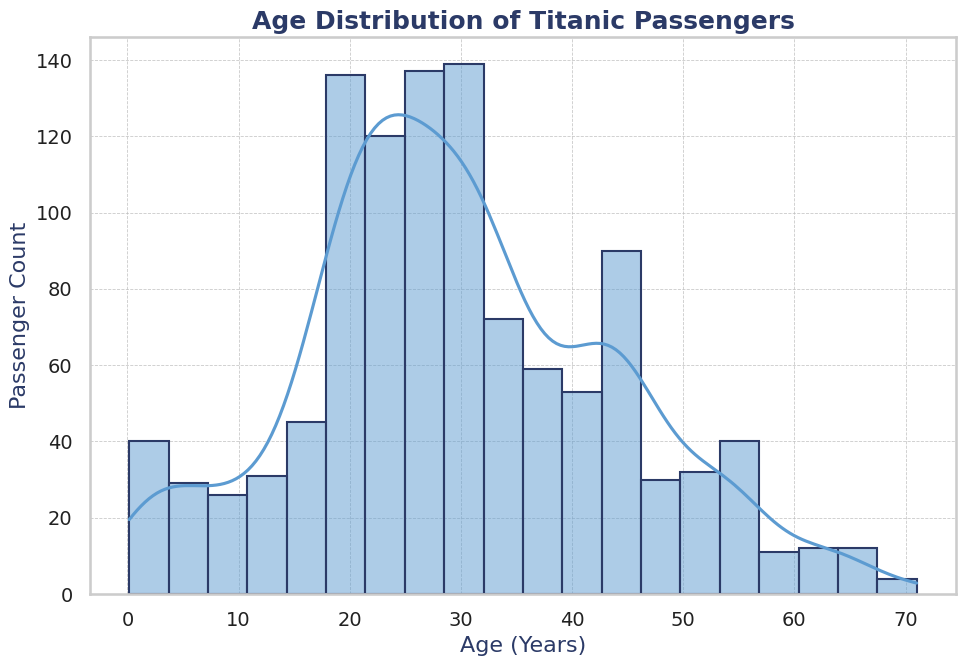

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style and context for presentation
sns.set_style("whitegrid")
sns.set_context("talk")

# Figure size is adjusted for better readability in presentations
plt.figure(figsize=(10, 7))

# Creating a histogram with KDE (Kernel Density Estimate)
sns.histplot(
    df_filtered['Age'],  # Input data
    bins=20,  # Number of bins for the histogram
    kde=True,  # Adds a smooth density line
    color="#5C9BD1",  # Primary bar color (light blue)
    edgecolor="#2B3A67"  # Edge color for bars (dark blue)
)

# Adding a clear and professional title
plt.title(
    "Age Distribution of Titanic Passengers",
    fontsize=18, fontweight='bold', color="#2B3A67"
)

# Labeling axes with appropriate font sizes and colors
plt.xlabel("Age (Years)", fontsize=16, color="#2B3A67")
plt.ylabel("Passenger Count", fontsize=16, color="#2B3A67")

# Enhancing tick readability with larger fonts and consistent colors
plt.xticks(fontsize=14, color="#212121")
plt.yticks(fontsize=14, color="#212121")

# Adding a light grid to enhance visual appeal and readability
plt.grid(color="#BDBDBD", linestyle="--", linewidth=0.6, alpha=0.8)

# Adjusting layout for better alignment and spacing
plt.tight_layout()

# Displaying the plot
plt.show()

# **Insights :**


#### 1. **Distribution of Passenger Ages**:
   - The age distribution is approximately **normal** with a slight right skew.  
   - Most passengers are aged between **20 and 40 years**, with a peak around **30 years**.  
   - Fewer passengers are in the extremes (young children and older adults above 60).  


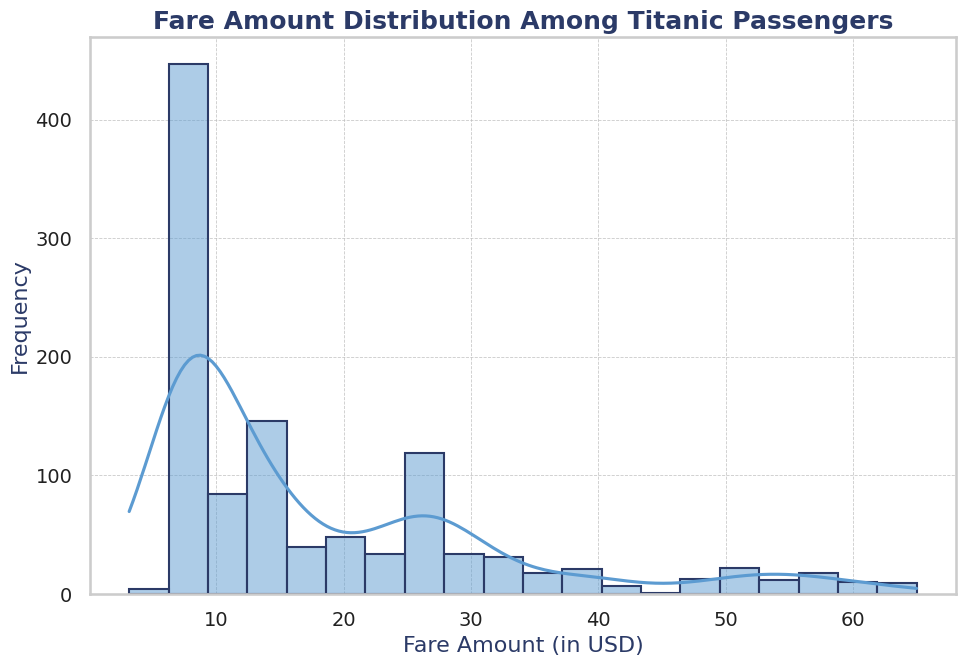

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style and context for a presentation
sns.set_style("whitegrid")
sns.set_context("talk")

# Adjusting figure size for better clarity during presentations
plt.figure(figsize=(10, 7))

# Creating the histogram with KDE
sns.histplot(
    df_filtered['Fare'],  # Data column for Fare
    bins=20,  # Number of bins for the histogram
    kde=True,  # Adds a density line
    color="#5C9BD1",  # Bar color (light blue)
    edgecolor="#2B3A67"  # Bar edge color (dark blue)
)

# Adding a title with improved readability
plt.title(
    "Fare Amount Distribution Among Titanic Passengers",
    fontsize=18, fontweight='bold', color="#2B3A67"
)

# Labeling the axes with clear font sizes and consistent colors
plt.xlabel("Fare Amount (in USD)", fontsize=16, color="#2B3A67")
plt.ylabel("Frequency", fontsize=16, color="#2B3A67")

# Enhancing the tick labels for better readability
plt.xticks(fontsize=14, color="#212121")
plt.yticks(fontsize=14, color="#212121")

# Adding a subtle grid for visual guidance
plt.grid(color="#BDBDBD", linestyle="--", linewidth=0.6, alpha=0.8)

# Adjusting layout for a polished presentation appearance
plt.tight_layout()

# Displaying the plot
plt.show()



#### 2. **Distribution of Passenger Fare Amounts**:
   - The fare distribution is **highly right-skewed**, with most fares clustered below **$20**.  
   - Fewer passengers paid higher fares, indicating that expensive tickets were less common.  
   - There is a significant peak around the **lower price range**, suggesting affordable travel was the norm.  

In [ ]:
# Numerical Columns List
numerical_column = df_filtered.select_dtypes(include=['int64', 'float64']).columns
numerical_column

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# Categorical Columns List
categorical_column=df.select_dtypes(exclude=['int64','float64']).columns
categorical_column

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
correlation_matrix = df_filtered[numerical_column].corr() # Calculate the correlation matrix for the numerical columns within the DataFrame
print(correlation_matrix) # Print the correlation matrix

             PassengerId       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.020427 -0.068249 -0.024119  0.009169
Age            -0.020427  1.000000 -0.277750 -0.184951  0.074780
SibSp          -0.068249 -0.277750  1.000000  0.383050  0.344224
Parch          -0.024119 -0.184951  0.383050  1.000000  0.321621
Fare            0.009169  0.074780  0.344224  0.321621  1.000000


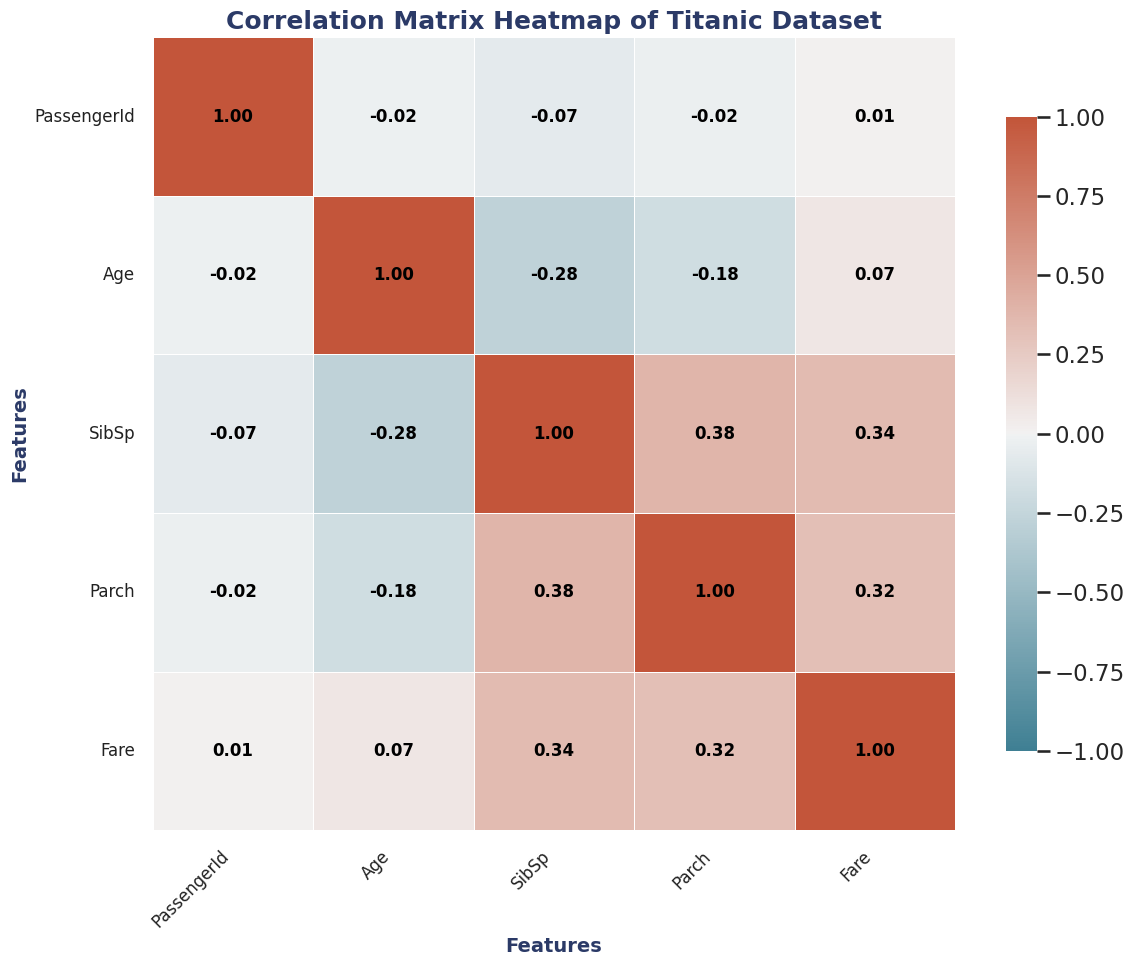

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style and context for presentation
sns.set_style("whitegrid")
sns.set_context("talk")

# Define a visually appealing color palette for the heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plotting the heatmap with adjustments for clarity and presentation
plt.figure(figsize=(12, 10))  # Increased figure size for better visibility
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation coefficients
    fmt=".2f",  # Format numbers to two decimal places
    cmap=cmap,  # Color map for divergent data
    vmin=-1, vmax=1,  # Correlation values range
    cbar_kws={"shrink": 0.8},  # Adjust color bar size
    linewidths=0.7,  # Gridline thickness for distinction
    annot_kws={"size": 12, "fontweight": "bold", "color": "black"}  # Annotation style
)

# Adding a descriptive title and styling axis labels
plt.title(
    "Correlation Matrix Heatmap of Titanic Dataset",
    fontsize=18, fontweight="bold", color="#2B3A67"
)
plt.xlabel("Features", fontsize=14, fontweight="bold", color="#2B3A67")
plt.ylabel("Features", fontsize=14, fontweight="bold", color="#2B3A67")

# Customizing ticks for better readability
plt.xticks(fontsize=12, rotation=45, ha="right", color="#212121")
plt.yticks(fontsize=12, rotation=0, color="#212121")

# Tight layout for a polished appearance
plt.tight_layout()

# Display the heatmap
plt.show()


### **Insights :**

- Fare has a moderate positive correlation with Survived (0.132). This implies that **passengers who paid higher fares might have had better survival rates, possibly due to being in higher-class cabins.**

- Fare has a positive correlation with Parch (0.322), suggesting that **passengers with parents or children aboard tended to purchase more expensive tickets.** This could indicate families traveling in higher classes.

- The correlation between Age and SibSp is -0.278, indicating **that younger passengers were more likely to travel with siblings or spouses. Older passengers might have traveled alone more often.**

- The correlation between Survived and Age is -0.066, **showing almost no relationship**. Survival rates likely depended more on other factors (e.g., gender, class, or family connections) than on age alone.

- The correlation between Fare and SibSp is 0.344, meaning **passengers traveling with siblings/spouses were more likely to have purchased higher-priced tickets.**


In [ ]:
df_filtered[categorical_column].mode()

,Name,Sex,Ticket,Cabin,Embarked
0,"Connolly, Miss. Kate",Male,1601,G6,Southampton
1,"Kelly, Mr. James",NaN,CA 2144,NaN,NaN


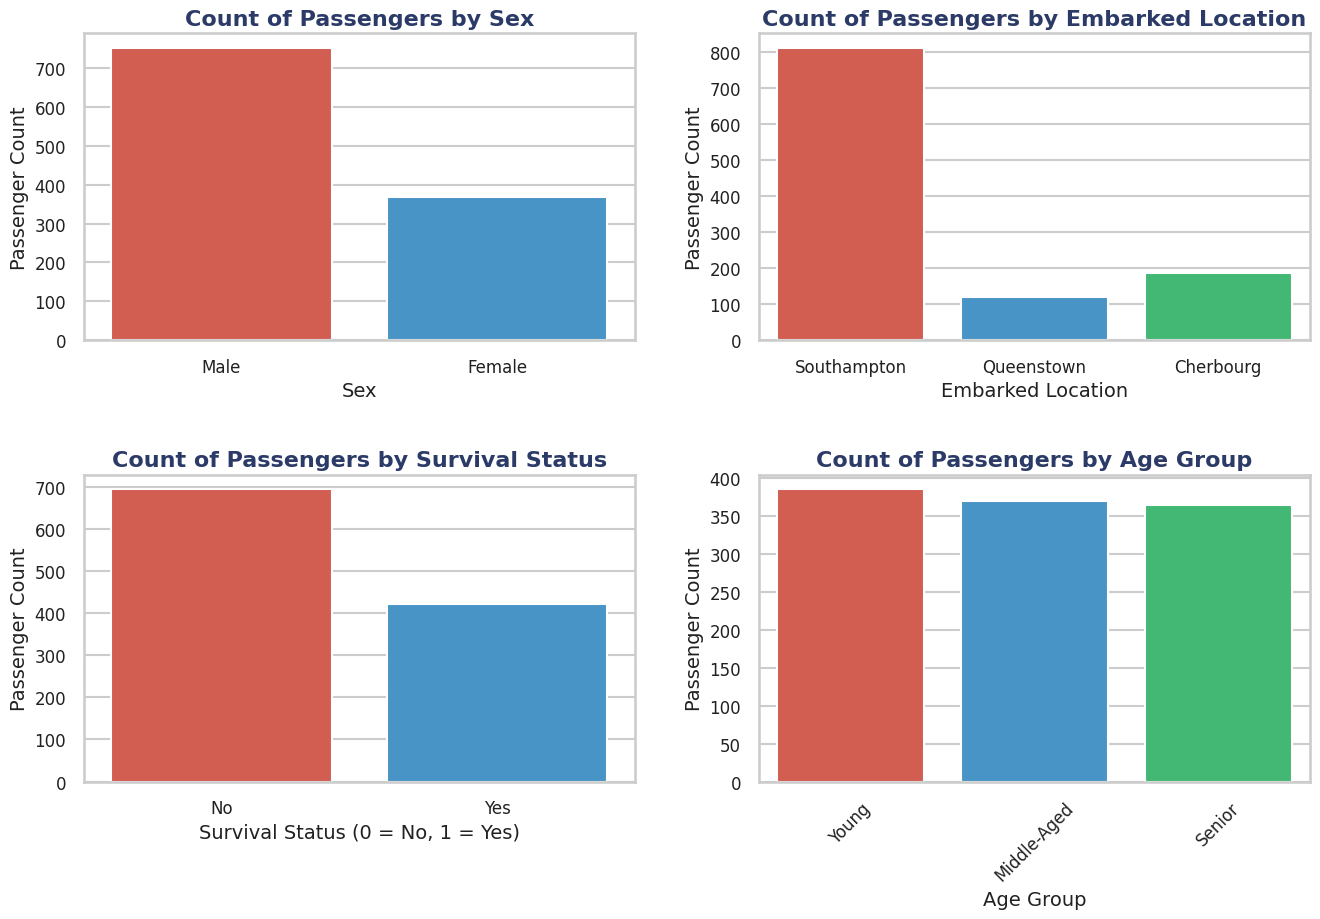

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with Red, Blue, and Green
palette = ['#e74c3c', '#3498db', '#2ecc71']  # Red, Blue, Green

# Create subplots for better visual comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Slightly larger for better clarity

# Plot 1: Countplot of 'Sex'
sns.countplot(x='Sex', data=df_filtered, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Count of Passengers by Sex', fontsize=16, fontweight='bold', color="#2B3A67")
axes[0, 0].set_xlabel("Sex", fontsize=14, color="#212121")
axes[0, 0].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[0, 0].tick_params(axis='x', labelsize=12, labelcolor="#212121")
axes[0, 0].tick_params(axis='y', labelsize=12, labelcolor="#212121")

# Plot 2: Countplot of 'Embarked'
sns.countplot(x='Embarked', data=df_filtered, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Count of Passengers by Embarked Location', fontsize=16, fontweight='bold', color="#2B3A67")
axes[0, 1].set_xlabel("Embarked Location", fontsize=14, color="#212121")
axes[0, 1].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[0, 1].tick_params(axis='x', labelsize=12, labelcolor="#212121")
axes[0, 1].tick_params(axis='y', labelsize=12, labelcolor="#212121")

# Plot 3: Countplot of 'Survived'
sns.countplot(x='Survived', data=df_filtered, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Count of Passengers by Survival Status', fontsize=16, fontweight='bold', color="#2B3A67")
axes[1, 0].set_xlabel("Survival Status (0 = No, 1 = Yes)", fontsize=14, color="#212121")
axes[1, 0].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[1, 0].tick_params(axis='x', labelsize=12, labelcolor="#212121")
axes[1, 0].tick_params(axis='y', labelsize=12, labelcolor="#212121")

# Plot 4: Countplot of 'Age_Group'
sns.countplot(x='Age_Group', data=df_filtered, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Count of Passengers by Age Group', fontsize=16, fontweight='bold', color="#2B3A67")
axes[1, 1].set_xlabel("Age Group", fontsize=14, color="#212121")
axes[1, 1].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[1, 1].tick_params(axis='x', labelsize=12, labelcolor="#212121", rotation=45)
axes[1, 1].tick_params(axis='y', labelsize=12, labelcolor="#212121")

# Adjust layout for a clean and balanced appearance
plt.tight_layout(pad=2.0)

# Show the subplots
plt.show()


### Insights:

1. **Gender Distribution**:
   - The majority of passengers are male, with significantly fewer females onboard.

2. **Embarkation Points**:
   - Most passengers embarked from **Southampton**, followed by **Cherbourg** and **Queenstown**.

3. **Survival Rate**:
   - A larger proportion of passengers did not survive, with fewer survivors in the dataset.

4. **Age Group Distribution**:
   - The dataset shows a relatively balanced distribution among **Young**, **Middle-Aged**, and **Senior** age groups.

## **Using two Numericals/Categoricals columns**

In [ ]:
# Calculate survival counts by sex
survival_by_sex = df_filtered.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Print the results
print("Survival Counts by Sex:")
survival_by_sex

Survival Counts by Sex:


Survived,No,Yes
Sex,,
Female,145,222
Male,550,201


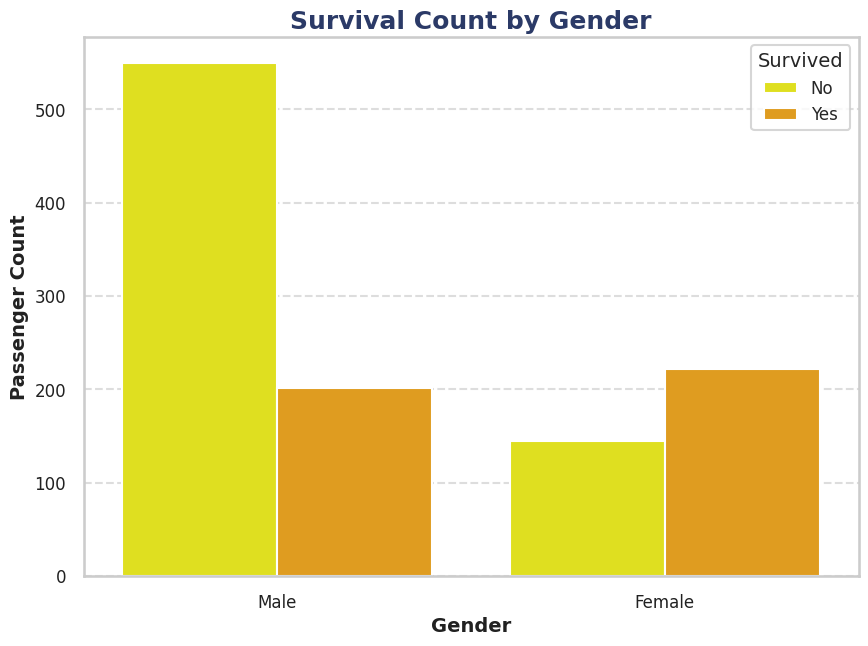

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(10, 7))

# Plotting the countplot with a custom color palette
sns.countplot(
    x='Sex', hue='Survived', data=df_filtered,
    palette=["yellow", "orange"] # Yellow and Orange
)

# Add title and axis labels with professional styling
plt.title('Survival Count by Gender', fontsize=18, fontweight='bold', color="#2B3A67")
plt.xlabel('Gender', fontsize=14, fontweight='bold', color="#212121")
plt.ylabel('Passenger Count', fontsize=14, fontweight='bold', color="#212121")

# Customize tick labels
plt.xticks(fontsize=12, color="#212121")
plt.yticks(fontsize=12, color="#212121")

# Add a legend with custom title
plt.legend(title='Survived', fontsize=12, title_fontsize=14, loc='upper right')

# Add a horizontal grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.5, color="#BDBDBD")

# Adjust layout for a p



### **Insights :**
- **Gender and Survival :**Females had a significantly higher survival count (222) compared to males (201), indicating that gender played a crucial role in survival. This aligns with evacuation protocols prioritizing women.




In [ ]:
# How did survival rates vary across the different classes, and what factors might explain these differences?
df_grouped = df_filtered.groupby(['Survived','Pclass'])['PassengerId'].count()
df_grouped

Survived  Pclass      
No        First Class      84
          Second Class    131
          Third Class     480
Yes       First Class      78
          Second Class    133
          Third Class     212
Name: PassengerId, dtype: int64

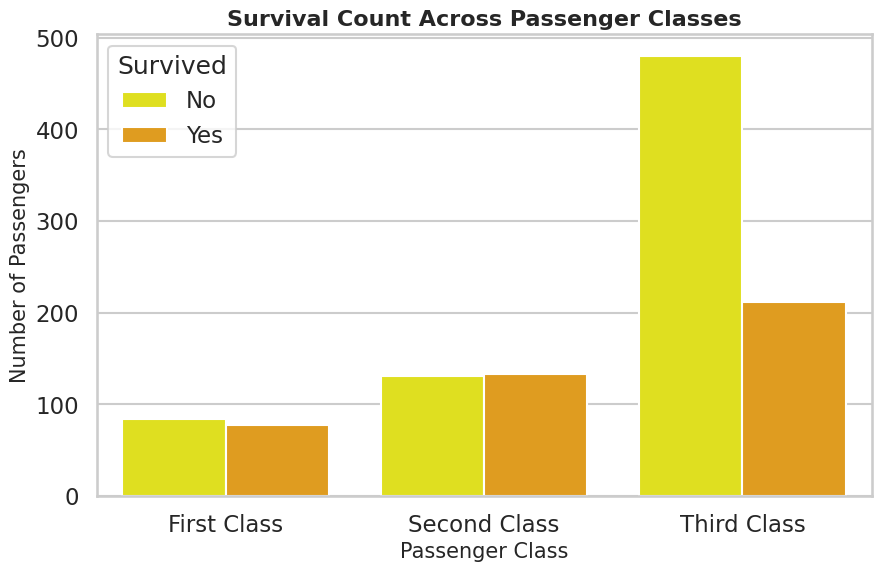

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df_filtered, palette=["yellow", "orange"], order=['First Class', 'Second Class', 'Third Class'])
plt.title('Survival Count Across Passenger Classes', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.show()

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


### **Insights :**

- **Survivor Distribution by Class :**First-class had the highest survival rate (78 survivors out of 162 passengers), while third-class had the lowest survival rate (212 survivors out of 692 passengers).

- **Passenger Distribution Across Classes :**Most passengers were in third class (692), followed by second class (264), and then first class (162), highlighting the socioeconomic disparity in the Titanic's passenger demographics.

In [ ]:
# How does the survival rate vary across the classes, and does fare play a role in improving survival odds?

fare_data_avg = df_filtered.groupby(['Survived','Pclass'])['Fare'].mean().round(2).unstack().fillna(0)
fare_data_avg

Pclass,First Class,Second Class,Third Class
Survived,,,
No,38.83,18.95,12.38
Yes,40.07,21.58,12.75


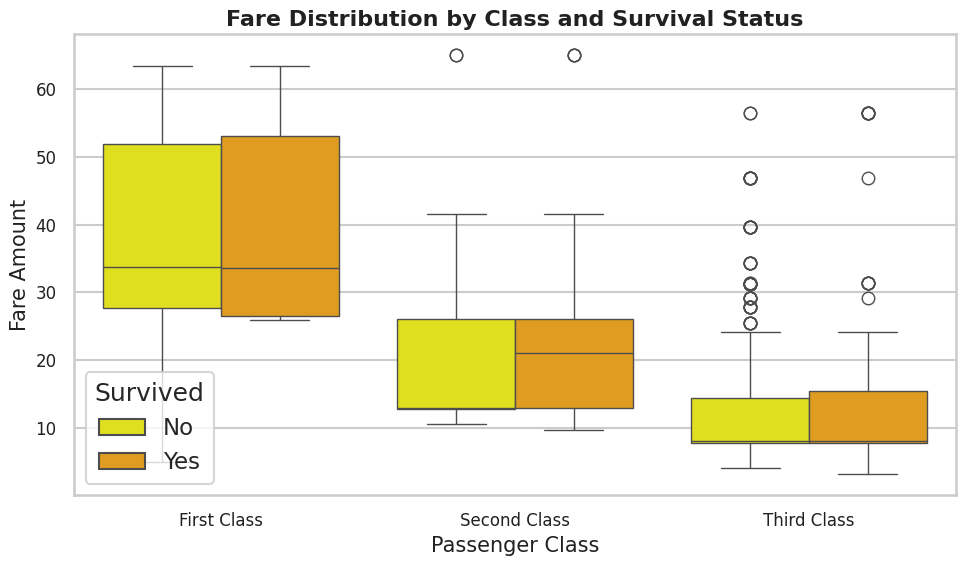

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Pclass', y='Fare', hue='Survived',
    data=df_filtered,  # Use the original DataFrame 'df_filtered'
    palette=["yellow", "orange"], order=['First Class', 'Second Class', 'Third Class']
)

# Add chart details
plt.title('Fare Distribution by Class and Survival Status', fontsize=16, fontweight='bold', color="#212121")
plt.xlabel('Passenger Class', fontsize=15, color="#212121")
plt.ylabel('Fare Amount', fontsize=15, color="#212121")

# Customize ticks
plt.xticks(fontsize=12, color="#212121")
plt.yticks(fontsize=12, color="#212121")

# Show the plot
plt.tight_layout()
plt.show()

### **Insights :**

- **Fares Reflect Class Hierarchy :** First-class passengers had the highest average fares, followed by second and third class, for both survivors and non-survivors.

- **Higher Fares Linked to Survival :**Survivors in all classes paid slightly higher fares on average compared to non-survivors, suggesting better survival chances for higher-paying passengers within each class.








In [ ]:
# Is there a significant correlation between the fare amount and survival rate?
df_grouped = df_filtered.groupby(['Survived',"Sex"])['Fare'].mean().round(2)
df_grouped

Survived  Sex   
No        Female    20.51
          Male      15.84
Yes       Female    21.21
          Male      19.86
Name: Fare, dtype: float64

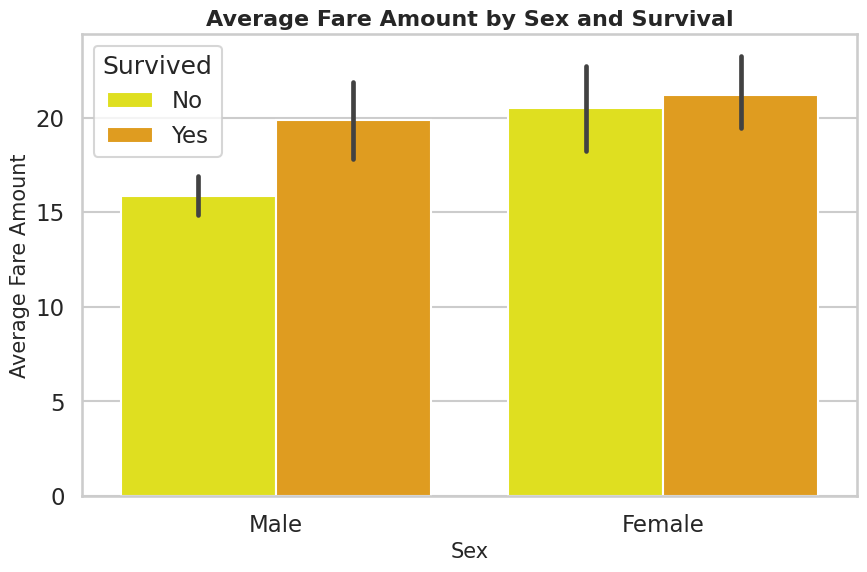

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Fare', hue='Survived', data=df_filtered, palette=["yellow", "orange"])
plt.title('Average Fare Amount by Sex and Survival', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Average Fare Amount', fontsize=15)
plt.show()

### **Insights :**

- Higher Fares for Survivors:T**he average fare paid by survivors was higher for both genders** compared to non-survivors. This could indicate a possible link between fare price and survival, suggesting that individuals in higher-paying classes may have had better chances of survival.
Gender-Based Fare Patterns:

- Among non-survivors, f**emales paid higher average fares (20.51) compared to males (15.83)**. Similarly, among survivors, females also paid higher average fares (21.20) than males (19.85). This might indicate that females were more likely to be in higher-paying classes than males.



In [ ]:
# Did survival rates vary significantly between different age groups?
age_group_survival = df_filtered.groupby(['Age_Group', 'Survived']).size().unstack().fillna(0)
age_group_survival

Survived,No,Yes
Age_Group,,
Young,237,148
Middle-Aged,224,145
Senior,234,130


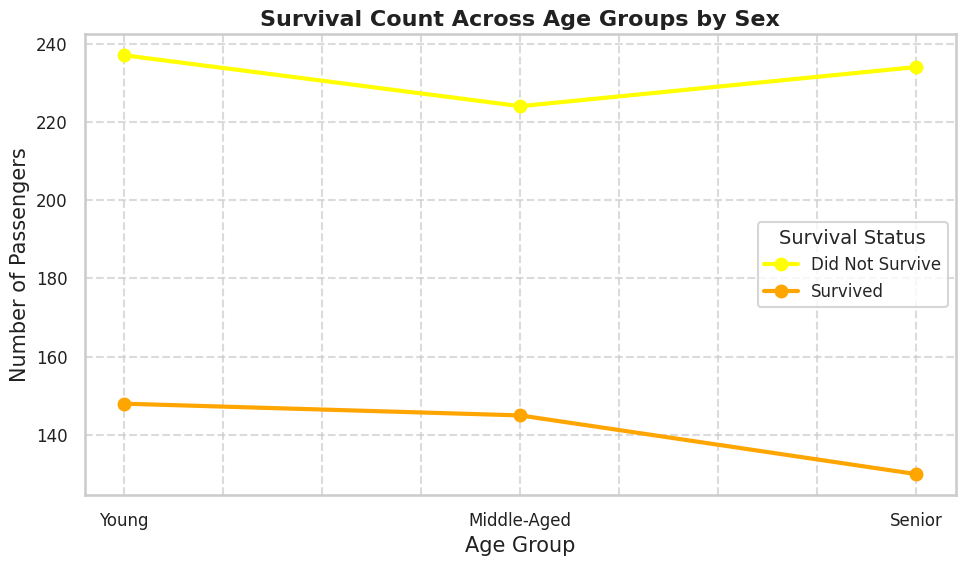

In [ ]:
# Aggregate the data for the line chart
age_group_survival = df_filtered.groupby(['Age_Group', 'Survived']).size().unstack().fillna(0)


import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the stacked line chart
plt.figure(figsize=(10, 6))

# Plot each survival status as a separate line
# Access columns using their actual names (e.g., 'No', 'Yes', or 0, 1 if they are numeric)
age_group_survival['No'].plot(kind='line', label='Did Not Survive', color="yellow", marker='o', linewidth=3)
age_group_survival['Yes'].plot(kind='line', label='Survived', color="orange", marker='o', linewidth=3)

# Add chart details
plt.title('Survival Count Across Age Groups by Sex', fontsize=16, fontweight='bold', color="#212121")
plt.xlabel('Age Group', fontsize=15, color="#212121")
plt.ylabel('Number of Passengers', fontsize=15, color="#212121")

# Customize ticks and add grid
plt.xticks(fontsize=12, color="#212121")
plt.yticks(fontsize=12, color="#212121")
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(title='Survival Status', fontsize=12, title_fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### **Insights :**

- **Age Group and Survival:** **Young individuals had a higher survival rate** (148) compared to Middle-Aged (145) and Senior (130) groups. This indicates that younger passengers might have been given priority or had better chances of survival.


- **Age Difference Between Survivors and Non-Survivors:Survivors in all age groups had slightly lower average ages** than non-survivors, particularly noticeable in the Young age group (14.15 years for survivors vs. 16.36 years for non-survivors), suggesting that younger individuals within each group had a survival advantage.







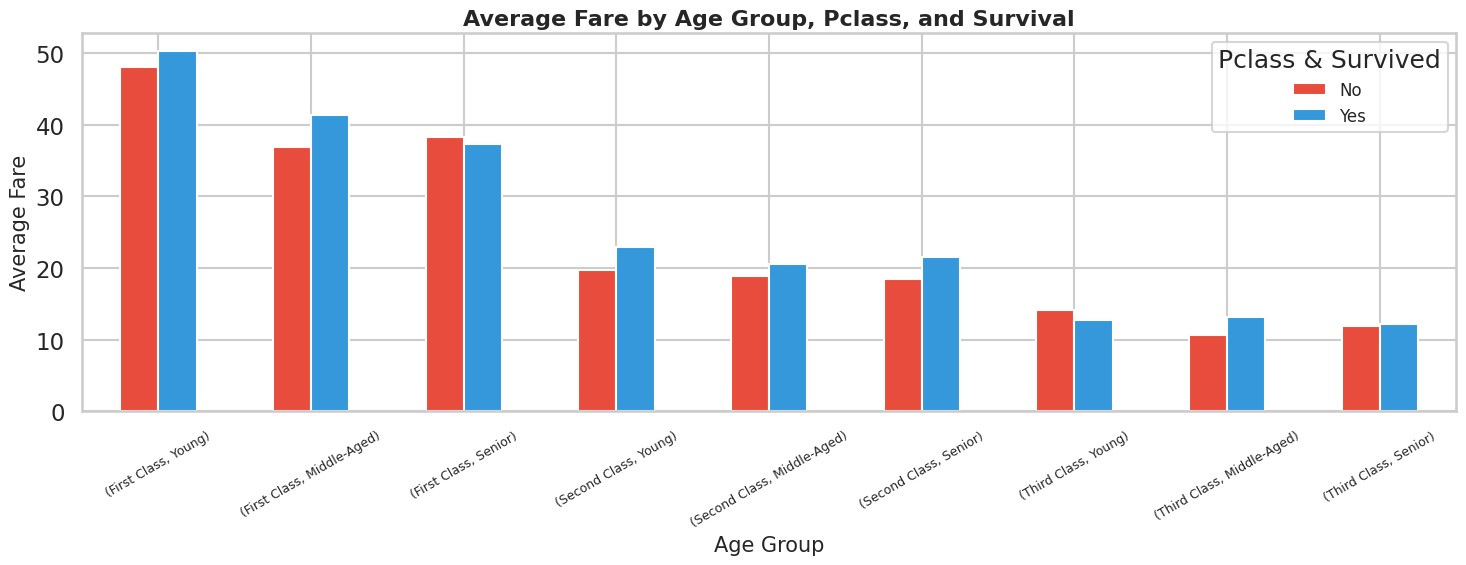

In [ ]:
# Are higher fares indicative of better access to lifeboats and evacuation resources?

import matplotlib.pyplot as plt

# Group the data by Pclass, Age_Group, and Survived, and calculate the mean Fare
df_grouped = df_filtered.groupby(['Pclass', 'Age_Group', 'Survived'])['Fare'].mean().unstack()

# Define a new color palette with distinct colors (similar to the previous request)
color_palette = ['#e74c3c','#3498db']  # Red, Blue

# Plot the bar chart with the new color palette
df_grouped.plot(kind='bar', figsize=(15, 6), color=color_palette)

# Customize the plot
plt.title('Average Fare by Age Group, Pclass, and Survival', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Average Fare', fontsize=15)
plt.xticks(rotation=30, fontsize=9)
plt.legend(title='Pclass & Survived', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


### **Insights :**

- **SIMILAR TRENDS ACROSS SURVIVORS :** Survivors tend to have paid slightly more on average compared to non-survivors across all classes.
- **SENIOR PASSENGERS :** Seniors in first and second classes show a smaller fare gap between survivors and non-survivors.
- **THIRD CLASS FARES :** The average fare for third-class passengers remains consistent, reflecting the affordability for large groups or families.

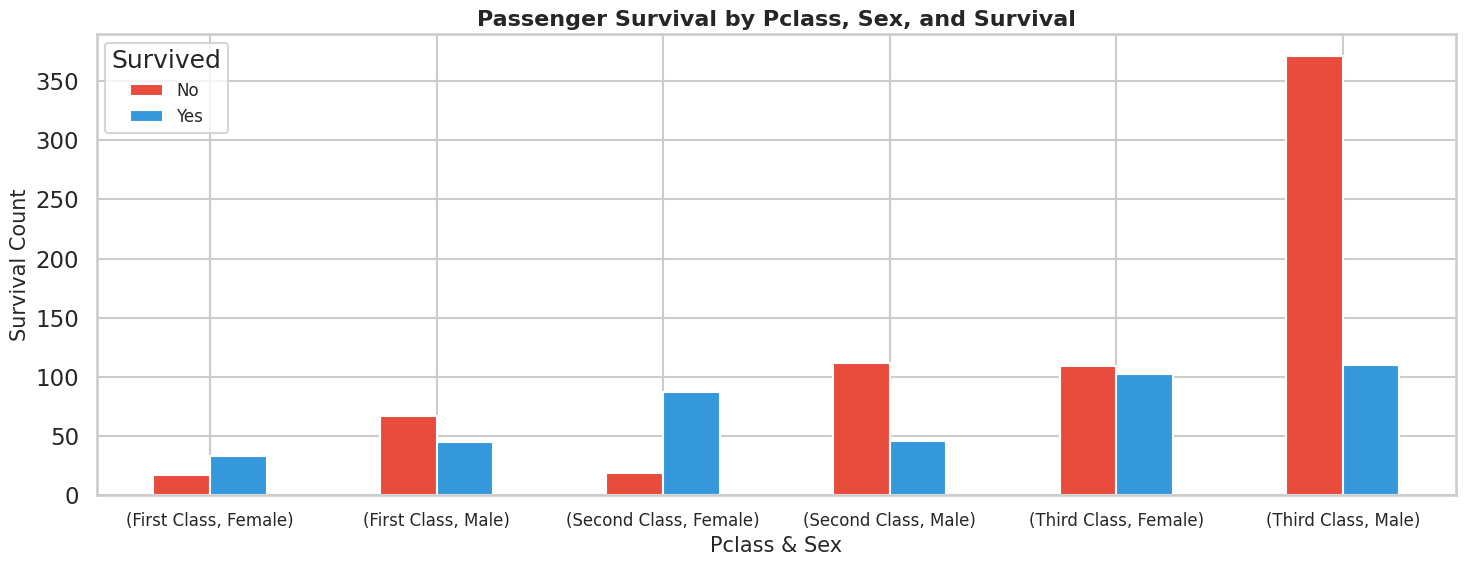

In [ ]:
# Does the observed trend indicate a prioritization of women during the evacuation process?

import matplotlib.pyplot as plt

# Group the data by Pclass, Sex, and Survived, and count the number of passengers
df_grouped = df_filtered.groupby(['Pclass', 'Sex', 'Survived'])['PassengerId'].count().unstack()

# Define the color palette as per your preferred colors
color_palette = ['#e74c3c', '#3498db']  # Red and Blue

# Plot the bar chart with the survival count for each group, applying the color palette
df_grouped.plot(kind='bar', figsize=(15, 6), color=color_palette)

# Customize the plot with correct labels and title
plt.title('Passenger Survival by Pclass, Sex, and Survival', fontsize=16, fontweight='bold')
plt.xlabel('Pclass & Sex', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Survived', fontsize=12)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


## **Insights :**

- **GENDER IMPACT ON SURVIVAL :** Females across all classes had a higher survival rate compared to males (orange bars taller for females).
- **CLASS VARIATION :** The survival rate is the highest in first class for both genders, with the disparity reducing in lower classes.
- **THIRD CLASS MALES AT HIGH RISK :** Males in third class had a disproportionately high mortality rate.


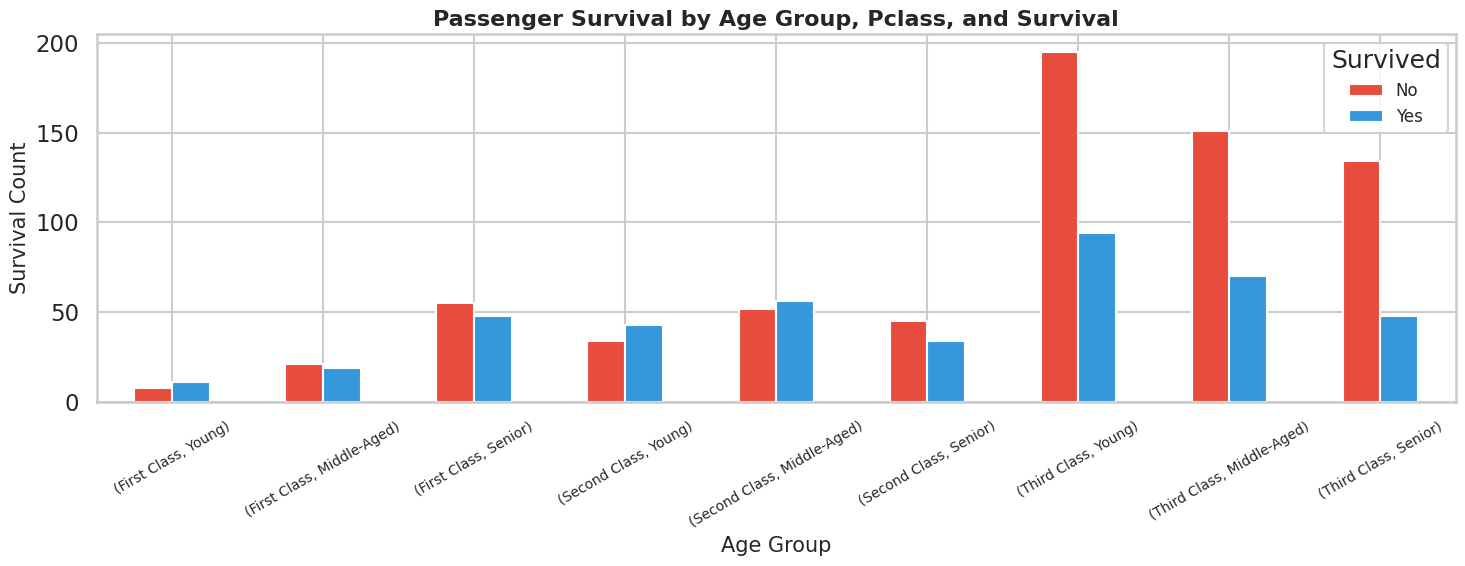

In [ ]:
import matplotlib.pyplot as plt

# Group the data by Pclass, Age_Group, and Survived, and count the number of passengers
df_grouped = df_filtered.groupby(['Pclass', 'Age_Group', 'Survived'])['PassengerId'].count().unstack()

# Define the color palette as per your preferred colors
color_palette = ['#e74c3c', '#3498db']  # Red and Blue

# Plot the bar chart with the survival count for each group
df_grouped.plot(kind='bar', figsize=(15, 6), color=color_palette)

# Customize the plot with correct labels and title
plt.title('Passenger Survival by Age Group, Pclass, and Survival', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.xticks(rotation=30, fontsize=10)
plt.legend(title='Survived', fontsize=12)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


## **Insights :**

- **HIGHER FARES IN FIRST CLASS :** Passengers in the first class, regardless of their age group or survival status, paid the highest fares on average.
- **IMPACT OF AGE :** Younger passengers in first class appear to have slightly lower average fares compared to seniors.
- **SECOND AND THIRD CLASS COMPARISON :** Second-class fares are moderate, while third-class fares are significantly lower, with less variation across age groups.
- **SURVIVAL TREND :** Survivors (orange bars) seem to have a slight trend of paying more in first and second class compared to non-survivors

## **Final Insights :**
- **Socioeconomic Influence on Survival :** Passengers in first class had the highest survival rates (48%), followed by second class (50%), and third class (30%). Higher-paying passengers had better access to lifeboats and safety resources.
- **Gender Disparity in Survival :**Females had a significantly higher survival rate than males across all classes, reflecting evacuation protocols ("women and children first"). Third-class males faced the highest mortality risk.
- **Age Impact :**Younger passengers, especially children, had higher survival rates compared to middle-aged and senior passengers. Survivors in all age groups were slightly younger than non-survivors.

- **Fares Reflect Access to Safety :**Survivors consistently paid higher fares across all classes, suggesting that fare levels indirectly influenced survival chances by determining cabin proximity to lifeboats and evacuation points.

- **Class Inequality :**Third-class passengers accounted for the majority of deaths (480 non-survivors), highlighting stark class-based disparities in survival opportunities.


## **Recommendations :**

- **Improved Evacuation Policies :** Future maritime safety protocols should prioritize equitable access to lifeboats and resources, ensuring no socioeconomic bias.
- **Enhanced Design for Accessibility :** Ship designs should consider balanced lifeboat placements and routes to prevent class-based survival disparities.
- **Emergency Preparedness Training :** Crew and passengers should be trained to follow unbiased and efficient evacuation protocols during emergencies.
- **Data-Informed Planning :** Utilize historical data, such as Titanic's survival trends, to refine safety measures and emergency resource allocation for modern transport systems.


## **Conclusion :**

The Titanic tragedy serves as a powerful reminder of how factors such as socioeconomic status, gender, and age can significantly impact survival outcomes in a disaster. The survival patterns observed—where first-class passengers and females had a clear advantage, and third-class passengers, particularly males, suffered disproportionately—reveal deep-rooted inequalities in access to safety resources. Socioeconomic status, reflected by the class in which passengers traveled, played a pivotal role, with higher-paying passengers having better access to lifeboats and safety measures. Similarly, gender disparity and age also influenced survival, with women and children having higher survival rates, and younger individuals surviving at higher rates than older passengers.

This analysis emphasizes the need for reforms in evacuation policies, ensuring equitable access to safety resources for all passengers, irrespective of class, gender, or age. A critical review of ship designs, prioritizing balanced lifeboat placements and routes, can address these disparities. Additionally, the implementation of comprehensive and unbiased emergency preparedness training for both crew and passengers is essential to ensure that evacuation procedures are followed efficiently and fairly in any future crisis.

Ultimately, the Titanic disaster highlights the importance of learning from history to improve safety measures. By leveraging data from past tragedies, we can shape more inclusive and effective safety protocols for modern maritime and transportation systems, ensuring that no one is left behind in the face of an emergency.






